<img src='./img/joint_school_banner_2.png' alt='Joint training school - atmosphere' align='center' width='100%'></img>

<br>

# Stratospheric ozone monitoring with satellite data

### About

2020 has experienced a record-breaking ozone hole over the Antarctic due to naturally occurring meteorlogical conditions and the continued presence of ozone depleting substances in the atmosphere. The ozone hole grew rapidly from mid-August and peaked at around 24.8 million square kilometres on 20 September 2020, spreading over most of the Antarctic continent.

It was the longest-lasting and one of the largest and deepest holes since the ozone layer monitoring began 40 years ago. It was driven by a strong, stable and cold polar vortex and very cold temperatures in the stratosphere (the layer of the atmosphere between around 10 km and round 50 km altitude). The same meteorological factors also contributed to the record [2020 Arctic ozone hole](https://public.wmo.int/en/media/news/arctic-ozone-depletion-reached-record-level).

This case study introduces you to the Metop-A/B/C GOME-2 Level-2 data to analyse and animate the Antarctic ozone hole in September 2020.
Read more about the unusual ozone hole in 2020 [here](https://public.wmo.int/en/media/news/record-breaking-2020-ozone-hole-closes).

<img src='./img/ozone.gif' alt='Ozone' align='center' width='80%'></img>


### How to access the data

Total ozone column information from the Metop-A, -B and -C satellites are available via the website of [EUMETSAT AC SAF](https://acsaf.org/), which is the EUMETSAT Satellite Application Facility on Atmospheric Composition Monitoring.
AC SAF offers different data products. [Offline products](https://acsaf.org/offline_access.php) are available usually after 2-3 days from sensing and provide different trace gas column information, such as `total ozone column`.

Offline data products can be downloaded via the DLR FTP Server, which can be accessed as guest under: [ftp://acsaf.eoc.dlr.de](ftp://acsaf.eoc.dlr.de).

### Module outline
* [1.1 - Load Metop-A/B/C GOME-2 Total Column Ozone Level 2 data and aggregate it](#load_11)
* [1.2 - Binning of Metop-A/B/C GOME-2 Level 2 data onto a regular two-dimensional grid](#gridding_11)
* [1.3 - *Optional: Loop through all the folders of Metop-A/B/C GOME-2 Level 2 data and create daily gridded netCDF files*](#optional_loop_11)
* [1.4 - Animate daily gridded Metop-A/B/C GOME-2 Level 2 Ozone information for each day in September 2020](#animate_11)






<hr>

#### Load required libraries

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import ipynb

from netCDF4 import Dataset
import pandas as pd


from matplotlib import animation

from IPython.display import HTML
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

#### Load helper functions

In [2]:
%run ./functions.ipynb

<hr>

## <a id='load_11'></a>1.1 Load Metop-A/B/C GOME-2 Total Column Ozone Level-2 data and aggregate it

#### Load daily Metop-A/B/C GOME-2 Total Column Ozone Level 2 data as `xarray.DataArray`

Metop-A GOME-2 Level-2 data are disseminated in the `HDF5` format and are organised in five groups, internally:
* `META_DATA`
 * Product Metadata
* `GEOLOCATION`
 * Date & Time (all retrievals)
 * 4 Corner Coordinates & Centre of Ground Pixel
 * Solar, Line-of-Sight Zenith, and realtive Azimuth angles at TOA
 * Orbit information
* `TOTAL_COLUMNS`
 * Total and tropospheric column amounts of the various trace gases with corresponding (relative) errors
* `DETAILED_RESULTS`
 * Geophysical parameters (surface, cloud and aerosol values)
 * Vertical column, slant column, and AMF values with corresponding errors
 * Fittings diagnostics (chi-square, RMS, etc.)
 * Various subgroups for trace gas specific data (e.g. O<sub>3</sub>, NO<sub>2</sub>, SO<sub>2</sub>, etc.)
* `CLOUD_PROPERTIES`
 * Retrieve cloud properties


Relevant information is in the groups `GEOLOCATION`, `TOTAL_COLUMNS` and `CLOUD_PROPERTIES`. With the help of the function [load_l2_data_xr](./functions.ipynb#load_l2_data_xr), you can generate a `xarray.DataArray` object by using information stored in the groups of the data file. The data files for this workflow are in the data directory `./data/ozone/2a/`.

The function generates a `xarray.DataArray` from a given set of `HDF5` files and matches variable information with latitude and longitude information. The result is a `xarray.DataArray` with one dimension and `latitude` and `longitude` information as coordinates.

Let us first load the Ozone data for 1 September 2020 by using the following function kwargs:
> directory=**(directory_2a, folder_list_2a[0])**<br>
> internal_filepath=**'TOTAL_COLUMNS'** <br>
> parameter=**'O3'**<br>
> lat_path=**'GEOLOCATION/LatitudeCentre'**<br>
> lon_path=**'GEOLOCATION/LongitudeCentre'** <br>
> no_of_dims=**1** <br>
> paramname=**'O3'** <br>
> unit=**'DU'** <br>
> longname=**'Tropospheric column density of O3'**


As we want to load the Ozone data, for each day in September 2020, you can already load all folders of the September folder in a list of folders. As data array, you can specify the first entry of the folder list.

In [3]:
directory_2a = './data/ozone/2a/'
folder_list_2a = os.listdir(directory_2a)
folder_list_2a.sort()

data_array_a = load_l2_data_xr(directory=os.path.join(directory_2a, folder_list_2a[0]), 
                             internal_filepath='TOTAL_COLUMNS', 
                             parameter='O3', 
                             lat_path='GEOLOCATION/LatitudeCentre', 
                             lon_path='GEOLOCATION/LongitudeCentre', 
                             no_of_dims=1, 
                             paramname='O3',
                             unit='DU',
                             longname='Tropospheric column density of O3')

data_array_a

<xarray.DataArray 'O3' (ground_pixel: 210325)>
array([306.75012, 305.4925 , 306.60675, ..., 212.58649, 211.79292,
       212.53848], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 65.06 65.38 65.69 ... -66.51 -66.85 -67.19
    longitude  (ground_pixel) float32 270.1 269.6 269.2 ... 121.7 121.5 121.2
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

<br>

We repeat the same procedure as above for the GOME-2 Level-2 Ozone data files from the Metop-B satellite. Metop-B data files are in the folder directory `./data/ozone/2b/`.

In [4]:
directory_2b = './data/ozone/2b/'
folder_list_2b = os.listdir(directory_2b)
folder_list_2b.sort()

data_array_b = load_l2_data_xr(directory=os.path.join(directory_2b, folder_list_2b[0]), 
                             internal_filepath='TOTAL_COLUMNS', 
                             parameter='O3', 
                             lat_path='GEOLOCATION/LatitudeCentre', 
                             lon_path='GEOLOCATION/LongitudeCentre', 
                             no_of_dims=1, 
                             paramname='O3',
                             unit='DU',
                             longname='Tropospheric column density of O3')

data_array_b

<xarray.DataArray 'O3' (ground_pixel: 196142)>
array([302.55356, 301.86996, 303.85617, ..., 220.36534, 216.78001,
       214.04637], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 67.78 68.05 68.32 ... -73.73 -74.07 -74.41
    longitude  (ground_pixel) float32 276.7 276.1 275.4 ... 145.3 145.1 144.8
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

<br>

And the same procedure is repeated again for the GOME-2 Level-2 Ozone data files of Metop-C. The data files are in the folder directory `./data/ozone/2c/`.

In [5]:
directory_2c = './data/ozone/2c/'
folder_list_2c = os.listdir(directory_2c)
folder_list_2c.sort()

data_array_c = load_l2_data_xr(directory=os.path.join(directory_2c, folder_list_2c[0]), 
                             internal_filepath='TOTAL_COLUMNS', 
                             parameter='O3', 
                             lat_path='GEOLOCATION/LatitudeCentre', 
                             lon_path='GEOLOCATION/LongitudeCentre', 
                             no_of_dims=1, 
                             paramname='O3',
                             unit='DU',
                             longname='Tropospheric column density of O3')

data_array_c

<xarray.DataArray 'O3' (ground_pixel: 196106)>
array([315.57162, 316.5622 , 308.41885, ..., 175.5501 , 176.89006,
       177.08255], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 68.24 68.51 68.77 ... -73.53 -73.88 -74.22
    longitude  (ground_pixel) float32 9.354 8.696 8.019 ... 258.8 258.5 258.3
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

<br>

#### Load cloud fraction information

In the previous section, you loaded the GOME-2 Level-2 Ozone information from the three satellites Metop-A, Metop-B and Metop-C. 
The next step is to load the `CloudFraction` information, for the three satellites, Metop-A, Metop-B and Metop-C. You can use again the function [load_l2_data_xr](./functions.ipynb#load_l2_data_xr). You can specify `CLOUD_PROPERTIES` as the internal filepath and and `CloudFraction` as the parameter.

You can make use of the defined folder paths above. The first step, is to load the `CloudFraction` information from 1 September 2020 from the Metop-A satellite.

In [6]:
cloud_fraction_a = load_l2_data_xr(directory=os.path.join(directory_2a, folder_list_2a[0]),
                                   internal_filepath='CLOUD_PROPERTIES',
                                   parameter='CloudFraction', 
                                   lat_path='GEOLOCATION/LatitudeCentre', 
                                   lon_path='GEOLOCATION/LongitudeCentre', 
                                   no_of_dims=1, 
                                   paramname='CloudFraction',
                                   unit='-',
                                   longname='Cloud Fraction') 
cloud_fraction_a

<xarray.DataArray 'CloudFraction' (ground_pixel: 210325)>
array([0.87946874, 0.96248007, 0.95143765, ..., 0.92415404, 0.90315986,
       0.8922751 ], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 65.06 65.38 65.69 ... -66.51 -66.85 -67.19
    longitude  (ground_pixel) float32 270.1 269.6 269.2 ... 121.7 121.5 121.2
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Cloud Fraction
    units:      -

<br>

The next step is to load the `CloudFraction` information for the data files from the Metop-B satellite.

In [7]:
cloud_fraction_b = load_l2_data_xr(os.path.join(directory_2b, folder_list_2b[0]),
                                    'CLOUD_PROPERTIES',
                                    'CloudFraction', 
                                    'GEOLOCATION/LatitudeCentre', 
                                    'GEOLOCATION/LongitudeCentre', 
                                    no_of_dims=1, 
                                    paramname='CloudFraction',
                                    longname='Cloud Fraction',
                                    unit='-') 
cloud_fraction_b

<xarray.DataArray 'CloudFraction' (ground_pixel: 196142)>
array([0.89672023, 0.9137915 , 0.8719177 , ..., 0.9811572 , 1.        ,
       1.        ], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 67.78 68.05 68.32 ... -73.73 -74.07 -74.41
    longitude  (ground_pixel) float32 276.7 276.1 275.4 ... 145.3 145.1 144.8
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Cloud Fraction
    units:      -

<br>

And the final step is to repeat the same procedure for the data files from the Metop-C satellite.

In [8]:
cloud_fraction_c = load_l2_data_xr(os.path.join(directory_2c, folder_list_2c[0]),
                                    'CLOUD_PROPERTIES',
                                    'CloudFraction', 
                                    'GEOLOCATION/LatitudeCentre', 
                                    'GEOLOCATION/LongitudeCentre',
                                    no_of_dims=1, 
                                    paramname='CloudFraction', 
                                    longname='Cloud Fraction',
                                    unit='-') 
cloud_fraction_c

<xarray.DataArray 'CloudFraction' (ground_pixel: 196106)>
array([0.7658016 , 0.86462057, 0.98024815, ..., 0.93960094, 0.9703462 ,
       0.9761614 ], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 68.24 68.51 68.77 ... -73.53 -73.88 -74.22
    longitude  (ground_pixel) float32 9.354 8.696 8.019 ... 258.8 258.5 258.3
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Cloud Fraction
    units:      -

<br>

#### Concatenate the data and cloud fraction information from the three satellites Metop-A, -B and -C

The next step is to concatenate (combine) the ground pixel information from the three satellites Metop-A, -B and -C. You can do this with the function `xr.concat()`. You can set the dimension `ground_pixel` as the concatenation dimension.

Repeat the concatenation step also for the cloud fraction information.

In [9]:
data_abc = xr.concat([data_array_a, data_array_b, data_array_c], dim='ground_pixel')

cloud_fraction_abc = xr.concat([cloud_fraction_a, cloud_fraction_b, cloud_fraction_c], dim='ground_pixel')

<br>

As a result, you see that for 1 September 2020, there is a total of more than 602000 ground pixel information for GOME-2 Level 2 Ozone data.

In [10]:
data_abc, cloud_fraction_abc

(<xarray.DataArray 'O3' (ground_pixel: 602573)>
 array([306.75012, 305.4925 , 306.60675, ..., 175.5501 , 176.89006,
        177.08255], dtype=float32)
 Coordinates:
     latitude   (ground_pixel) float32 65.06 65.38 65.69 ... -73.53 -73.88 -74.22
     longitude  (ground_pixel) float32 270.1 269.6 269.2 ... 258.8 258.5 258.3
 Dimensions without coordinates: ground_pixel
 Attributes:
     long_name:  Tropospheric column density of O3
     units:      DU,
 <xarray.DataArray 'CloudFraction' (ground_pixel: 602573)>
 array([0.87946874, 0.96248007, 0.95143765, ..., 0.93960094, 0.9703462 ,
        0.9761614 ], dtype=float32)
 Coordinates:
     latitude   (ground_pixel) float32 65.06 65.38 65.69 ... -73.53 -73.88 -74.22
     longitude  (ground_pixel) float32 270.1 269.6 269.2 ... 258.8 258.5 258.3
 Dimensions without coordinates: ground_pixel
 Attributes:
     long_name:  Cloud Fraction
     units:      -)

<br>

#### Mask the data array based on the cloud fraction information

Now you can mask the Ozone data (`data_abc`) with the help of the `CloudFraction` information (`cloud_fraction_abc`) and the function [generate_masked_array](./functions.ipynb#generate_masked_array). You want to mask out all pixels with a cloud cover higher than 20% (> 0.2) and only keep pixels where the cloud cover is less than 20% (< 0.2).

The function takes the following kwargs:
> xarray=**data_abc**<br>
> mask=**cloud_fraction_abc**<br>
> threshold=**0.2**<br>
> operator= <b>'<'</b> <br>
> drop=**True**

You might want to set the `drop` kwarg to True. In this way, all the pixels that are masked out are dropped from the masked data array. You see, that by setting `drop=True`, the number of ground pixels decreases to less than 223000.

In [11]:
o3_abc_masked_cf = generate_masked_array(xarray=data_abc, 
                                         mask=cloud_fraction_abc, 
                                         threshold=0.2 , 
                                         operator='<', 
                                         drop=True)
o3_abc_masked_cf


<xarray.DataArray (ground_pixel: 222923)>
array([271.81268, 273.83627, 270.78973, ..., 231.77931, 223.28477,
       330.44968], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 72.57 72.89 73.22 ... -67.53 -68.03 -63.03
    longitude  (ground_pixel) float32 274.5 274.0 273.5 ... 256.7 262.5 233.4
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

<br>

GOME-2 Level 2 data are disseminated on a 0 to 360 degrees longitude grid. Thus, the last step before the gridding process is to reassign the longitude values to a grid ranging from -180 degrees to 180 degrees. You can do this with the xarray function `assign_coords()`.

In [12]:
o3_abc_masked = o3_abc_masked_cf.assign_coords(longitude=(((o3_abc_masked_cf.longitude + 180) % 360) - 180))
o3_abc_masked

<xarray.DataArray (ground_pixel: 222923)>
array([271.81268, 273.83627, 270.78973, ..., 231.77931, 223.28477,
       330.44968], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 72.57 72.89 73.22 ... -67.53 -68.03 -63.03
    longitude  (ground_pixel) float32 -85.51 -86.01 -86.51 ... -97.53 -126.6
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

The `o3_abc_masked` object contains all the GOME-2 Level 2 Ozone ground pixel information, which you want to bring onto a regular-spaced two-dimensional latitude / longitude grid in the next step.

<br>

## <a id='gridding_11'></a>1.2 Binning of Metop-A/B/C GOME-2 Level-2 data onto a regular two-dimensional grid

The next step is to bring the ground pixel information of the `o3_abc_masked` array onto a regular two-dimensional grid. This process is called *binning*. As a preparation, you store the data values of `latitude`, `longitude` and `ozone` as variables x, y, z.

In [13]:
y = o3_abc_masked.latitude.data
x = o3_abc_masked.longitude.data
z = o3_abc_masked.data

<br>

#### Bin the data onto a 2D-grid with `np.histogram2d`

With `np.histogram2d`, you can bin the data onto a pre-defined two-dimensional grid (called bins). By assigning the data value object `z` to the keyword argument `weights`, the bin gets assigned the data value of the point that falls into the cell.

Since there will be more data points assigned to one cell (bin), you also have to create a `counts` array, which sums up the number of data points fallen into a bin. With this `counts` array, you can build the arithmetic mean of all the data points fallen into a bin.

The example below builds a regular grid of 1 deg x 1 deg.

In [14]:
zi, yi, xi = np.histogram2d(y, x, bins=(180,360), weights=z, normed=False)
counts, _, _ = np.histogram2d(y, x, bins=(180,360))
    
zi = zi / counts
zi

array([[310.62631226,          nan,          nan, ...,          nan,
                 nan,          nan],
       [319.00961304, 339.09393311,          nan, ...,          nan,
                 nan,          nan],
       [         nan, 363.58877563,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [255.45733643,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan, 255.15057373,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

Out of the binned information, you can create a `xarray.DataArray`, which gives you flexibility in further handling the regularly gridded Ozone values.

#### Create a `xarray.DataArray` of the regular gridded Ozone information

You can create a `xarray.DataArray` with the constructor `DataArray()`. Define the array with two dimensions, `latitude` and `longitude`, but add `time` as an additional coordinate information.

In [15]:
day = pd.to_datetime('2020-09-'+folder_list_2a[0])
xarray_abc = xr.DataArray(
                zi,
                dims=['latitude','longitude'],
                coords={
                    'time': day,
                    'latitude':(['latitude'], yi[:-1]),
                    'longitude':(['longitude'],xi[:-1])
                },
                attrs={'long_name': o3_abc_masked.long_name, 'units': o3_abc_masked.units},
                name='O3'
            )

xarray_abc

<xarray.DataArray 'O3' (latitude: 180, longitude: 360)>
array([[310.62631226,          nan,          nan, ...,          nan,
                 nan,          nan],
       [319.00961304, 339.09393311,          nan, ...,          nan,
                 nan,          nan],
       [         nan, 363.58877563,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [255.45733643,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan, 255.15057373,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
    time       datetime64[ns] 2020-09-01
  * latitude   (latitude) float64 -68.28 -67.4 -66.52 ... 86.99 87.86 88.74
  * longitude  (longitude) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

<br>

#### Visualize the gridded Ozone information

Let us visualize the gridded Ozone information for 1 September 2020. You can use the function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh). As projection, you can use `ccrs.Orthographic()` and set the latitude and longitude information to the Antarctic: `central_latitude=-90, central_longitude=0`. 

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Metop-A/B/C GOME-2 gridded Level-3 data of tropospheric column density of Ozone for 1 September 2020'}>)

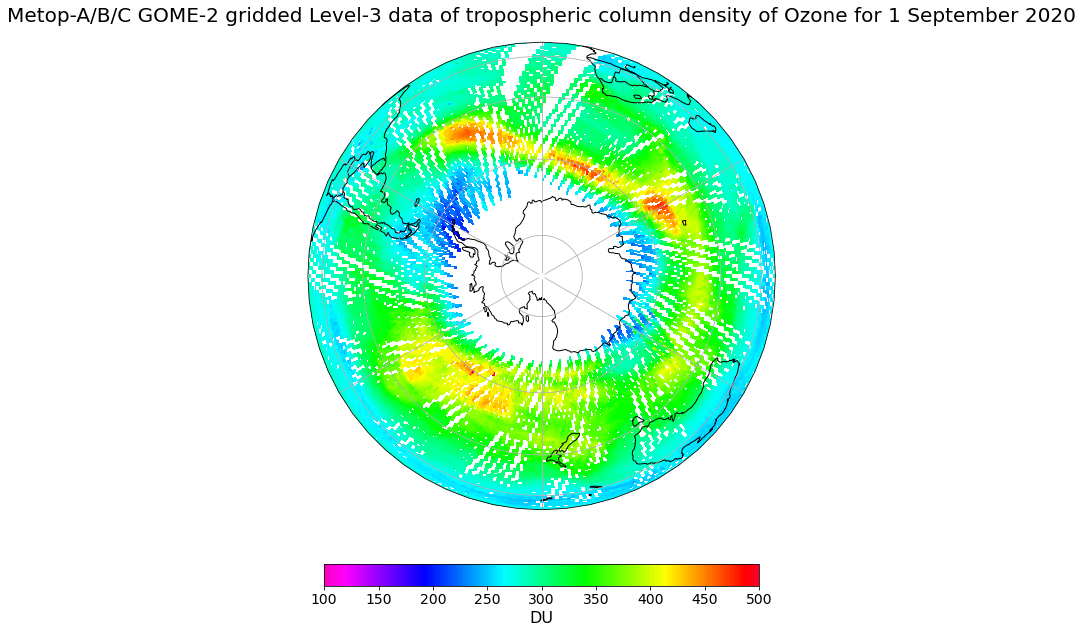

In [18]:
visualize_pcolormesh(data_array=xarray_abc, 
                     longitude=xarray_abc.longitude, 
                     latitude=xarray_abc.latitude, 
                     projection=ccrs.Orthographic(central_longitude=0,central_latitude=-90), 
                     color_scale='gist_rainbow_r', 
                     unit='DU', 
                     long_name='Metop-A/B/C GOME-2 gridded Level-3 data of tropospheric column density of Ozone for 1 September 2020', 
                     vmin=100, 
                     vmax=500)

<br>

#### Regrid data onto a custom 1 x 1 degree regular grid with `xarray.groupby_bins`

There is one additional step required, in order to bring multiple daily files onto the same regular grid. Without this step, each gridded data set would have its own grid definition and it would be not possible to animate the daily files in a coherent way.

For this reason, the next step defines a custom 1 x 1 degree regular grid and regrids the Ozone information onto the custom grid. You have to specify the custom grid information for both, latitude and longitude information.
You can use xarray's function `groupby_bins()` to regrid the Ozone values onto the specified grid.

With xarray's function `to_netcdf()`, you can save the gridded Ozone information for 1 September 2020 as `netCDF` file.

In [19]:
lat_bins = np.arange(-90,90+(1/2),1)
lon_bins = np.arange(-180,180+(1/2), 1)

# define a label for each bin corresponding to the central latitude
lat_center = np.arange(-90+(1/2),90,1)
lon_center = np.arange(-180+(1/2),180,1)

# Bring Ozone values onto a regular latitude grid and create the average of multiple values per cell
tmp_regrid_lat = xarray_abc.groupby_bins('latitude', lat_bins, labels=lat_center).mean()
# Bring Ozone values onto a regular longitude grid
tmp_regrid = tmp_regrid_lat.groupby_bins('longitude', lon_bins, labels=lon_center).mean()

# Save the gridded Ozone data as netCDF data file
tmp_regrid.to_netcdf('./data/ozone/'+day.strftime('%Y-%m-%d')+'.nc')

<br>

## <a id='optional_loop_11'></a>*1.3 Optional: Loop through all the folders of Metop-A/B/C GOME-2 Level 2 data and create daily gridded netCDF files*

The aim is to animate the Ozone hole development during September 2020. For this reason, we combine the individual steps from above in a *for* loop and create for each day in September 2020 a daily file of regular gridded Ozone information.

The individual steps are the following:
* Load the Ozone information as `xarray.DataArray` for the three satellites Metop-A, -B and -C and concatenate the data arrays
* Load the cloud fraction information as `xarray.DataArray` for the three satellites Metop-A, -B and -C and concatenate the data arrays
* Create a masked data array by masking out all pixels with a cloud fraction higher than 20%
* Bring the Ozone information onto a regular 1 x 1 degree grid
* Regrid the gridded Ozone information onto a custom defined regular grid
* Save the daily gridded Ozone information as netCDF file


Note: the loop below takes a bit of time, as we go through many data files. For this reason, executing the loop is optional. The daily gridded Ozone information for each day in September 2020 are available to be loaded directly under the folder `./data/ozone/daily/` . Thus, you can directly continue with the next step.

In [ ]:
for folder in folder_list_2c[1:]:
    folder_path_a = os.path.join(directory_2a,folder)
    folder_path_b = os.path.join(directory_2b,folder)
    folder_path_c = os.path.join(directory_2c,folder)

    print(folder_path_b)
    
    # Load Ozone information
    data_array_a = load_l2_data_xr(directory=folder_path_a, 
                                 internal_filepath='TOTAL_COLUMNS', 
                                 parameter='O3', 
                                 lat_path='GEOLOCATION/LatitudeCentre', 
                                 lon_path='GEOLOCATION/LongitudeCentre', 
                                 no_of_dims=1, 
                                 paramname='O3',
                                 unit='DU',
                                 longname='Tropospheric column density of O3')

    
    data_array_b = load_l2_data_xr(directory=folder_path_b, 
                                 internal_filepath='TOTAL_COLUMNS', 
                                 parameter='O3', 
                                 lat_path='GEOLOCATION/LatitudeCentre', 
                                 lon_path='GEOLOCATION/LongitudeCentre', 
                                 no_of_dims=1, 
                                 paramname='O3',
                                 unit='DU',
                                 longname='Tropospheric column density of O3')

    data_array_c = load_l2_data_xr(directory=folder_path_c, 
                                 internal_filepath='TOTAL_COLUMNS', 
                                 parameter='O3', 
                                 lat_path='GEOLOCATION/LatitudeCentre', 
                                 lon_path='GEOLOCATION/LongitudeCentre', 
                                 no_of_dims=1, 
                                 paramname='O3',
                                 unit='DU',
                                 longname='Tropospheric column density of O3')
    
    data_array_abc = xr.concat([data_array_b, data_array_c], dim='ground_pixel')

    # Load cloud fraction information 
    cloud_fraction_a = load_l2_data_xr(directory=folder_path_a,
                                     internal_filepath='CLOUD_PROPERTIES', 
                                     parameter='CloudFraction', 
                                     lat_path='GEOLOCATION/LatitudeCentre', 
                                     lon_path='GEOLOCATION/LongitudeCentre', 
                                     no_of_dims=1, 
                                     paramname='cloud_fraction', 
                                     unit='-', 
                                     longname='Cloud Fraction')

    cloud_fraction_b = load_l2_data_xr(directory=folder_path_b,
                                     internal_filepath='CLOUD_PROPERTIES', 
                                     parameter='CloudFraction', 
                                     lat_path='GEOLOCATION/LatitudeCentre', 
                                     lon_path='GEOLOCATION/LongitudeCentre', 
                                     no_of_dims=1, 
                                     paramname='cloud_fraction', 
                                     unit='-', 
                                     longname='Cloud Fraction')

    cloud_fraction_c = load_l2_data_xr(directory=folder_path_c,
                                     internal_filepath='CLOUD_PROPERTIES', 
                                     parameter='CloudFraction', 
                                     lat_path='GEOLOCATION/LatitudeCentre', 
                                     lon_path='GEOLOCATION/LongitudeCentre', 
                                     no_of_dims=1, 
                                     paramname='cloud_fraction', 
                                     unit='-', 
                                     longname='Cloud Fraction')
    cloud_fraction_abc = xr.concat([cloud_fraction_b, cloud_fraction_c], dim='ground_pixel')
    
    # Generate a masked data array by masking out the ground pixels with a cloud fraction of more than 20%
    o3_abc_masked = generate_masked_array(xarray=data_array_abc, 
                                            mask=cloud_fraction_abc, 
                                            threshold=0.2 , 
                                            operator='<', 
                                            drop=True)
    
    o3_abc_masked_coords = o3_abc_masked.assign_coords(longitude=(((o3_abc_masked.longitude + 180) % 360) - 180))
    
    # Binning of Ozone information onto a regular 1 x 1 degree grid and organize the gridded information as a xarray.DataArray()
    y = o3_abc_masked_coords.latitude.data
    x = o3_abc_masked_coords.longitude.data
    z = o3_abc_masked_coords.data
        
    zi, yi, xi = np.histogram2d(y, x, bins=(180,360), weights=z, normed=False)
    counts, _, _ = np.histogram2d(y, x, bins=(180,360))
    
    zi = zi / counts
    zi

    day = pd.to_datetime('2020-09-'+folder)
    
    xarray_abc_new = xr.DataArray(
                zi,
                dims=['latitude','longitude'],
                coords={
                    'time': day,
                    'latitude':(['latitude'], yi[:-1]),
                    'longitude':(['longitude'],xi[:-1])
                },
                attrs={'long_name': o3_abc_masked.long_name, 'units': o3_abc_masked.units},
                name='O3'
            )

    # Regrid the gridded Ozone information onto a custom defined regular grid
    lat_bins = np.arange(-90,90+(1/2),1)
    lon_bins = np.arange(-180,180+(1/2), 1)

    lat_center = np.arange(-90+(1/2),90,1)
    lon_center = np.arange(-180+(1/2),180,1)

    tmp_regrid_lat = xarray_abc_new.groupby_bins('latitude', lat_bins, labels=lat_center).mean()

    tmp_regrid = tmp_regrid_lat.groupby_bins('longitude', lon_bins, labels=lon_center).mean()
    
    # Save the regridded Ozone information for each day as a netCDF file
    tmp_regrid.to_netcdf('./'+day.strftime('%Y-%m-%d')+'.nc')

<br>

## <a id='animate_11'></a>1.4 Animate daily gridded Metop-A/B/C GOME-2 Ozone information for each day in September 2020

#### Open daily gridded Ozone files for September 2020 with `xarray.open_mfdataset`

Let us now open the generated daily gridded Ozone information for September 2020 and store them as one single `xarray.Dataset`. You can use xarray's function `open_mfdataset()`, which allows the generation of a `xarray.Dataset` on the basis of multiple netCDF files. You have to provide the function the dimension you want to concatenate the files on. In this case, you want to combine the files based on the `time` dimension.

In [20]:
o3_daily = xr.open_mfdataset('./data/ozone/daily/*.nc', concat_dim='time', combine='nested')
o3_daily

<xarray.Dataset>
Dimensions:         (longitude_bins: 360, latitude_bins: 180, time: 30)
Coordinates:
  * longitude_bins  (longitude_bins) float64 -179.5 -178.5 ... 178.5 179.5
  * latitude_bins   (latitude_bins) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * time            (time) datetime64[ns] 2020-09-01 2020-09-02 ... 2020-09-30
Data variables:
    O3              (time, latitude_bins, longitude_bins) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>

<br>

The next step is to load the Ozone variable from the `xarray.Dataset` above.

In [21]:
o3 = o3_daily.O3
o3

<xarray.DataArray 'O3' (time: 30, latitude_bins: 180, longitude_bins: 360)>
dask.array<concatenate, shape=(30, 180, 360), dtype=float64, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude_bins  (longitude_bins) float64 -179.5 -178.5 ... 178.5 179.5
  * latitude_bins   (latitude_bins) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * time            (time) datetime64[ns] 2020-09-01 2020-09-02 ... 2020-09-30

#### Visualize `Ozone` with `pcolormesh`

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Metop-A/B/C GOME-2 gridded Level-3 data of tropospheric column density of Ozone - 2020-09-26'}>)

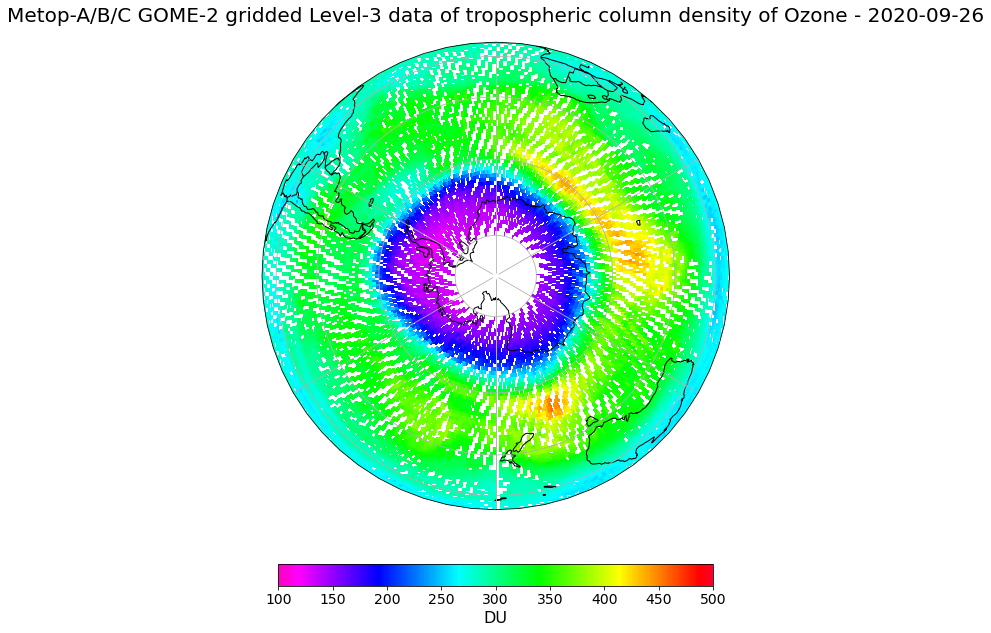

In [26]:
day = 25
visualize_pcolormesh(data_array=o3[day,:,:], 
                     longitude=o3.longitude_bins, 
                     latitude=o3.latitude_bins, 
                     projection=ccrs.Orthographic(central_longitude=0,central_latitude=-90), 
                     color_scale='gist_rainbow_r', 
                     unit='DU', 
                     long_name='Metop-A/B/C GOME-2 gridded Level-3 data of tropospheric column density of Ozone - ' + str(o3.time[day].dt.strftime('%Y-%m-%d').data), 
                     vmin=100, 
                     vmax=500)

<br>

#### Animate `Ozone` over Antarctica for September 2020

The final step is now to animate the daily gridded Level 3 total column ozone data over all days in September 2020. The animation allows us to see the the development of the ozone hole during September 2020.

The animation function consists of four parts:
- **Setting the initial state:**<br>
 Here, you define the general plot your animation shall use to initialise the animation. You can also define the number of frames (time steps) your animation shall have.
 
 
- **Function to animate:**<br>
 An animation consists of the function `animate()`. `animate()` animates the function over the given number of frames (time steps) and updates with each time step the visualization.
 
 
- **Create a `animate.FuncAnimation` object:** <br>
 The functions defined before are now combined to build an `animate.FuncAnimation` object.
 
 
- **Play the animation as video:**<br>
 As a final step, you can integrate the animation into the notebook with the `HTML` class. You take the generate animation object and convert it to a HTML5 video with the `to_html5_video` function

In [48]:
title = 'GOME-2 gridded Level 3 data of tropospheric column density of Ozone for - '

fig, ax = visualize_pcolormesh(data_array=o3[0,:,:], 
                     longitude=o3.longitude_bins, 
                     latitude=o3.latitude_bins, 
                     projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90), 
                     color_scale='gist_rainbow_r', 
                     unit='DU', 
                     long_name=title + str(o3.time[0].data)[0:10], 
                     vmin=100, 
                     vmax=500)


# Define the number of frames (the number of days from 1st September to 30th September).
frames = 29


def animate(i):
    img = ax.pcolormesh(o3.longitude_bins, 
                         o3.latitude_bins, 
                         o3[i,:,:], 
                         cmap='gist_rainbow_r', 
                         transform=ccrs.PlateCarree(),
                         vmin=100,
                         vmax=500,
                         shading='auto')
    ax.set_title(title + str(o3.time[i].data)[0:10], fontsize=20, pad=20.0)
    return img


ani = animation.FuncAnimation(fig, animate, frames, interval=500, blit=False,
                             repeat=True)

HTML(ani.to_html5_video())
plt.close()

#### Play the animation as HTML5 video

In [47]:
HTML(ani.to_html5_video())

<hr>

<img src='./img/copernicus_logo.png' alt='Logo EU Copernicus' align='left' width='20%'><br><br><br><br>

<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.